## Car Price Prediction 
### Abstract: From 1985 Ward's Automotive Yearbook

#### Araba Datası ile çalışacağım için web scraping ile arabam.com sitesi verilerinden bir kısmını BeatifulSoup çektim, benim için o da keyifli oldu dosyaya onu da ekleyeceğim.

In [3]:
#kütüphanelerimizi import ettik
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# ekranda aynı şekilde kalsın graph'lar o yüzden ekledik 

## Step 1: Reading and Understanding the Data
### Bu aşamada dataset'i tanıyacağız 

In [4]:
# çalışacağımız verisetini okuduk
car_data = pd.read_csv("CarPrice_Assignment.csv", index_col=0) 

In [5]:
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
len(car_data)
# len komutu ile kaç tane araba verisi var onu görmüş olduk

205

In [7]:
car_data.columns
# bunlar bizim columns'larımız

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
car_data.iloc[0]
# ilk index'deki alfa_romero verisini inceledik 

symboling                            3
CarName             alfa-romero giulia
fueltype                           gas
aspiration                         std
doornumber                         two
carbody                    convertible
drivewheel                         rwd
enginelocation                   front
wheelbase                         88.6
carlength                        168.8
carwidth                          64.1
carheight                         48.8
curbweight                        2548
enginetype                        dohc
cylindernumber                    four
enginesize                         130
fuelsystem                        mpfi
boreratio                         3.47
stroke                            2.68
compressionratio                     9
horsepower                         111
peakrpm                           5000
citympg                             21
highwaympg                          27
price                            13495
Name: 1, dtype: object

In [9]:
car_data.tail()
# sondaki verilere bakıyoruz

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [10]:
car_data.shape
# shape'i ise bize DataFrame'in şeklini gösteriyor diyebiliriz

(205, 25)

In [11]:
car_data.describe()
# data eğer dengeli bir şekilde dağılmışssa mean ve medyan değerinin(50%) birbirine yakın olmasını bekleriz 
# ama burada mean değeri daha büyük olduğu için medyandan dengeli dağılmış bir data olduğunu söyleyemeyiz
# mean'in sağa doğru kaymış olabileceğini söyleyebiliriz, veriyi görselleştirirken histogram üzerinden feature'lar için bakarız

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
car_data.CarName.unique()
# burada araba ile markasını birlikte görüyoruz

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
car_data.CarName.nunique()
# numberunique function'ı ile farklı kaç tane araba ve modeli var onu gördük

147

In [14]:
car_data.info()
# veri yapılarını görüyoruz feature'ların 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

## Step 2 : Data Cleaning and Preparation
### Data'yı inceledikten sonra marka ve modelin ayrı olması gerektiğini veya yanlış yazılan araba markası isimlerinin değiştirilmesi gerektiğini etc yapacağız

In [15]:
car_data.drop_duplicates() # tekrarlanan satıları kaldırmak için uyguluyoruz 
car_data.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [16]:
Make = car_data['CarName'].apply(lambda x : x.split(' ')[0]) # whitespace'e göre ayırıp 0.indexi aldık
car_data.insert(2,"Make",Make) 

In [17]:
Make

car_ID
1      alfa-romero
2      alfa-romero
3      alfa-romero
4             audi
5             audi
          ...     
201          volvo
202          volvo
203          volvo
204          volvo
205          volvo
Name: CarName, Length: 205, dtype: object

In [18]:
Model = car_data['CarName'].apply(lambda x : x.split(' ')[-1]) # yukarıda yaptığımız işlemi şimdi modelleri ayırmak için yaptık

In [19]:
Model

car_ID
1            giulia
2           stelvio
3      Quadrifoglio
4                ls
5             100ls
           ...     
201            (sw)
202           144ea
203           244dl
204             246
205           264gl
Name: CarName, Length: 205, dtype: object

In [20]:
car_data.insert(3,"Model",Model)
car_data.drop(['CarName'],axis=1,inplace=True) # columns'ı sildik gerek kalmadığı için

In [21]:
car_data.head()

,symboling,Make,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
car_data.groupby(["Make"])[["price"]].mean()
# modele ve markaya göre gruplayıp ortalamasını aldık 

,price
Make,
Nissan,5499.000000
alfa-romero,15498.333333
audi,17859.166714
bmw,26118.750000
buick,33647.000000
chevrolet,6007.000000
dodge,7875.444444
honda,8184.692308
isuzu,8916.500000


In [23]:
car_data.Model.to_frame()

,Model
car_ID,
1,giulia
2,stelvio
3,Quadrifoglio
4,ls
5,100ls
...,...
201,(sw)
202,144ea
203,244dl


In [24]:
car_data.Make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
# marka ve model stringlerini küçük harfe çevirdik

car_data.Make = car_data.Make.str.lower()
car_data.Model = car_data.Model.str.lower()

car_data.head()

,symboling,Make,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
def rename(x,y):
    car_data.Make.replace(x,y,inplace=True)
    
rename('porcshce','porsche')    
rename('vw','volkswagen')
rename('maxda','mazda')
rename('toyouta','toyota')
rename('vokswagen','volkswagen')

# bir function oluşuturup bunu yanlış yazılan isimleri replace etmek için kullandık ve inplace = True olması tekrar değişmesin diye

In [27]:
car_data.Make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 3: Visualizing the data

Data nasıl dağılmış, işimize yarayan değişkenler hangisi ya da outlier'lar var mı onlara bakacağız 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001407E8A3708>,
      dtype=object)

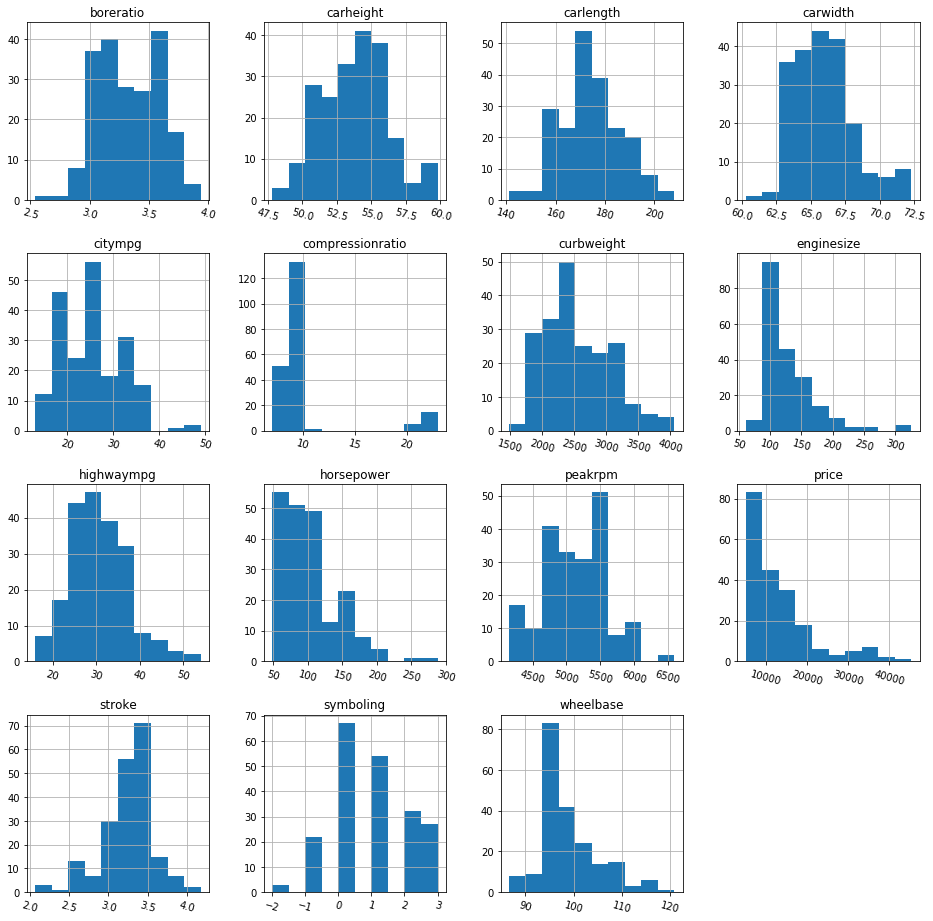

In [28]:
car_data.hist(figsize=(16,16), xrot=-15) 
# x label'ları daah iyi okuyabilmek için xrot değişkenini kullandık
#data'nın içinde aykırı veri var mı veya değişkenin nasıl bir yapıya sahip olduğunu ne şekilde dağıldığını görebiliriz
#teknik bir analiz yapmadan değişkenlerin yapısını görebiliyoruz

# price'a bakarsak aslında bizim data'mızdaki araba satışlarının düşük olduğunu söyleyebiliriz
# koyacağımız model'de buna göre çok yüksek fiyatları tahmin edemeyebilir, elimizdeki veri ne ise biz onu öğreneceğiz sonuçta 

# modelimizin eksi yönü olabilir ama bunu bilerek hareket edersek ; ünlü matematikçinin bir sözü var bütün modeller yanlıştır 
# ama bazıları faydalır, modeller sonuçta gerçeğin bir yakınsaması diyebiliriz, bize bir yönlendirme yapıyor diyebiliriz 

In [29]:
car_data.corr()
# correlation ile değişkenler arasında ki ilişkiyi anlıyabiliyoruz,
# örneğin horsepower ile price arasında 0.808'lik bir correlation var bu demek oluyor ki 0.808 oranında katsayıları artıyor 
# ama -1 olanlar tam tersi yönde etkisini gösteriyor örneğin a 1 artarken b 1 azalıyor diyebiliriz.
# 0 ise de zaten aralarında ilişki yok demek oluyor 
# ama şunu da söyleyebiliriz eğer çok fazla correlation var iki feature arasında bir tanesini dataya koymayadabiliriz
# belki modelin daha genellenebilir olmasını sağlayabilir, o yüzden bakmamız iyi olur
# sadece numeric değerler için hesaplayabilir pandas'ın bu functions'ı

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


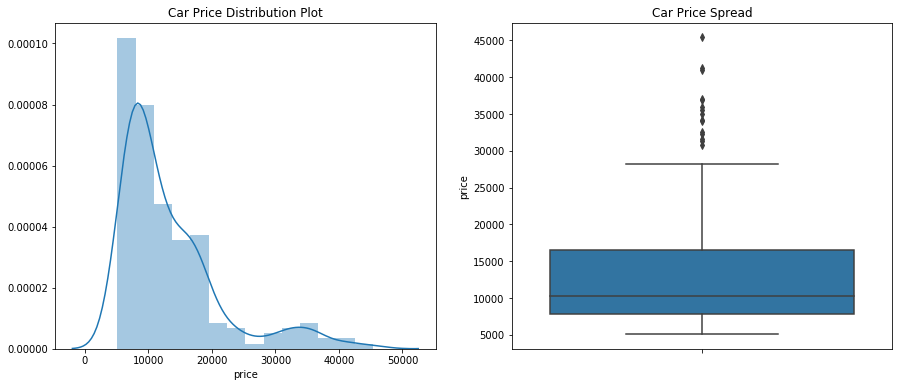

In [30]:
plt.figure(figsize=(15,6)) # scale ettik graphları

plt.subplot(1,2,1) # satır ve sütun sayısını belirtitk 
plt.title('Car Price Distribution Plot') # araba fiyatının dağılmış sütun grafiği, title olarak dataya isim veriyoruz
sns.distplot(car_data.price) # çubuk grafiğinde car price'ı incelemiş olduk

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_data.price) # seaborn kütüphanesinden boxplot'ı kullanıp yayılımını ve aykırı verileri görmüş olduk price üzerinde

plt.show()

In [31]:
print(car_data.price.describe(percentiles = [0.25,0.50,0.75,1])) # burada ise yüzdelik dilimlerini verip bakmak istedim
#Data'daki arabaların fiyatlarına bakarsak eğer yaklaşık %75'i 16.500$'ın altında yaklaşık %15'i ise 45.400 ile 16.500 arasında çıkarımını yapabiliriz

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


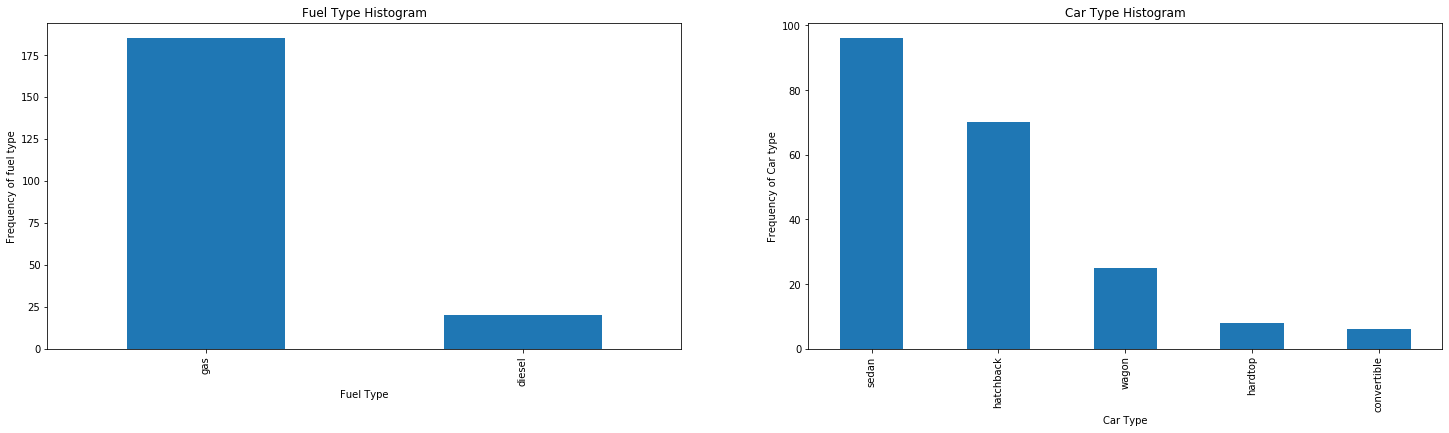

In [32]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1) # 1 row'luk 2 columns'lık bir graph oluşturup 1.sine Fuel Type Histogram'ı yerleştirdik
plt1 = car_data.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,2,2)
plt1 = car_data.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

# gas yakıt türü diesel'e göre daha fazla tercih ediliyor
# araba tiplerinde ise sedan ile hatchback diğer türlere göre daha fazla satılıyor diyebiliriz, histogramlara göre

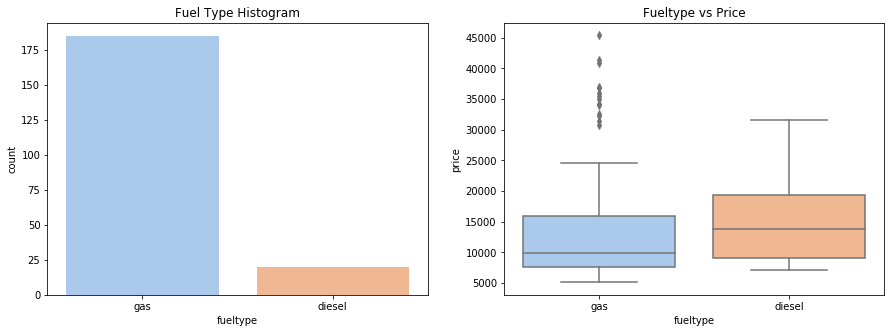

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(car_data.fueltype, palette=("pastel")) #palette ile renk listesi veriyoruz 

plt.subplot(1,2,2)
plt.title('Fueltype vs Price')
sns.boxplot(x=car_data.fueltype, y=car_data.price, palette=("pastel"))

plt.show()


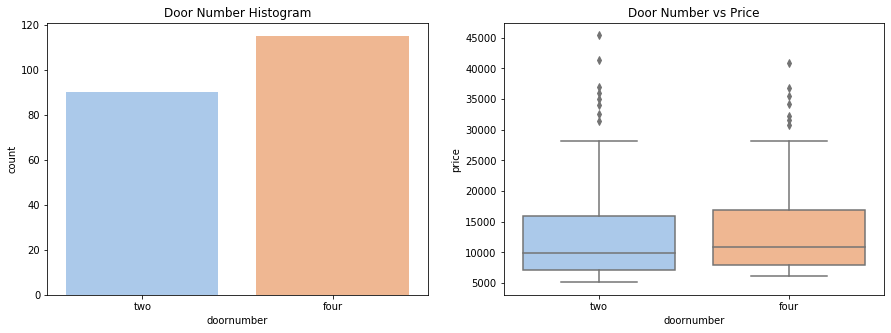

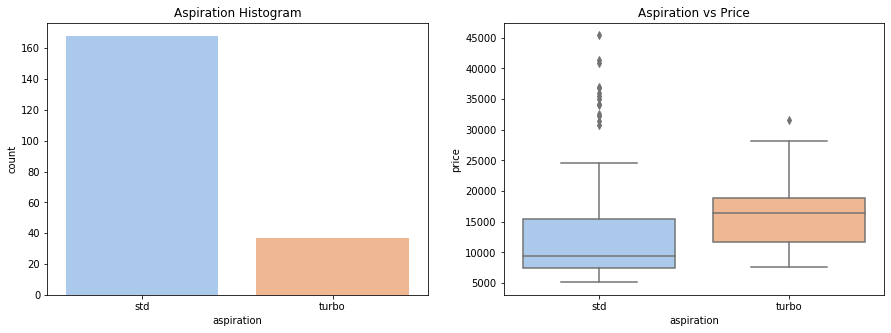

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car_data.doornumber, palette=("pastel")) #palette ile renk listesi veriyoruz 

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car_data.doornumber, y=car_data.price, palette=("pastel"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car_data.aspiration, palette=("pastel"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car_data.aspiration, y=car_data.price, palette=("pastel"))

plt.show()

# aslında kapı sayısının fiyat üzerinde bir etkisi olmadığını söyleyebiliriz
# ama turbolu aspiration'dan az data olmasına rağmen fiyata büyük bir etkisi olduğunu söyleyebiliriz, standart aspirationa göre 

In [35]:
car_count = car_data.Make.value_counts()
car_count
# modellerin sayısını value_counts ile çağırdık

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: Make, dtype: int64

In [36]:
import matplotlib.font_manager as fm # font_manager modülünü import ettik bars'ın üstüne yazmak için


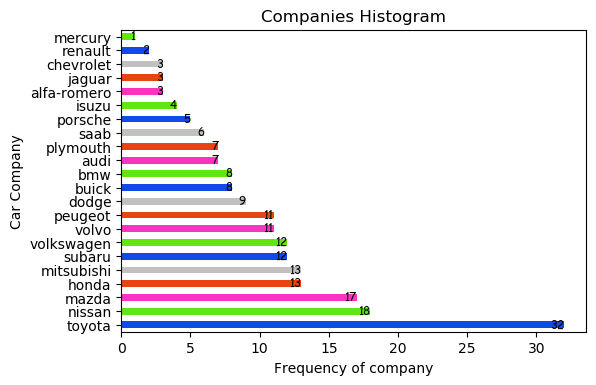

In [37]:
plt.figure(dpi=100)

colorCodes = ["#114BE6","#62E611","#FA34C1","#E64511","#C3C0C0"] # renk kodlarını aldık colormap üzerinden

plt1 = car_data.Make.value_counts().plot.barh(color=colorCodes)

plt.title('Companies Histogram')

plt1.set(xlabel = 'Frequency of company', ylabel='Car Company')

for i in range(len(car_count.index)):
    plt.text(car_count[i], i , int(car_count[i]),
            horizontalalignment='right',
            verticalalignment='center',
            color="k",
            fontproperties=fm.FontProperties(family="fantasy", weight="normal",size = "smaller"))

plt.show()
# data'da hangi araba markasından kaç tane var histogram üzerinden farklı renkler ile üzerine sayılarını yazdırarak görmüş olduk

In [38]:
car_data['horsepower']

car_ID
1      111
2      111
3      154
4      102
5      115
      ... 
201    114
202    160
203    134
204    106
205    114
Name: horsepower, Length: 205, dtype: int64

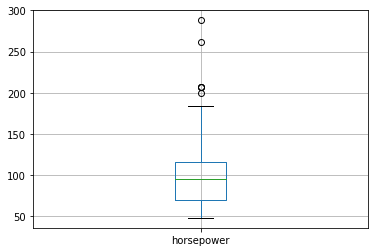

In [39]:
car_data.boxplot(["horsepower"])
# yeşil çizgi medyanı ifade ediyor, tam ortadaki değer oluyor
# 1st Qt(quartile) - 1. çeyreklik Data'nın %25'i buradan daha az durumda alttaki mavi çizgi
# 3rd Qt - Data'nın %75'i şu noktadan daha düşük durumda üstteki mavi çizgi
# Kutunun uzunluğu var IQR(ınter quartile range-çeyrek açıklığı) = 3rd Qt - 1st Qt ile bulabiliriz. 
# IQR bize datanın nasıl dağıldığı hakkında bilgi verir, IQR küçük ise data sıktır, varyansı daha düşüktür, IQR yüksek ise daha yayılmış bir data vardır
# limit noktaları ise (siyah çizgiler) üst taraftaki = 3rd Qt + IQR*1.5 alt taraftaki = 1st Qt - 1.5IQR  
# limit noktalarının dışındaki veriler ise outlier(aykırı değer) veriler oluyor, data'dan çıkartadabiliriz
# modeli genelleştirmek istediğimiz için hemen hemen tüm datalara uysun diye, bu dataları yakalamak için model genelleşmeyi bozabilir
# 

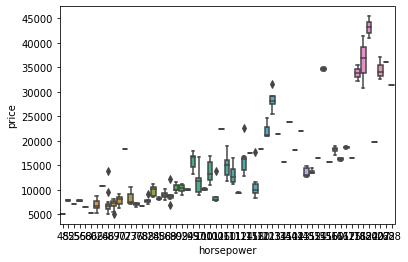

In [40]:
sns.boxplot(x = car_data["horsepower"], y = car_data["price"])
#plt.ylim(5000,20000) # scale edersek eğer daha rahat görmüş oluruz
# yukarı doğru bir eğim var diyebiliriz çünkü horsepower arttıkça fiyatı da artıyor diyebiliriz

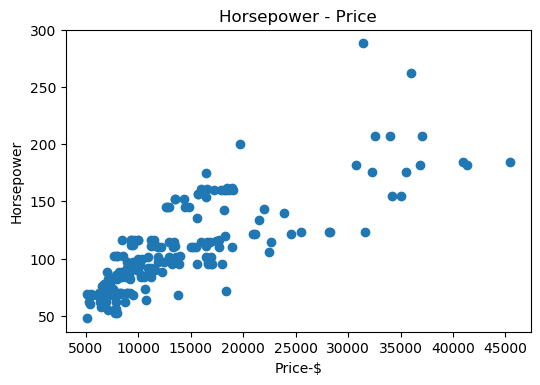

In [41]:
# numerical bir datayı scatter plot ile de inceleyebiliriz 
# aynı şekilde yukarı doğru bir eğim olduğunu söyleyebiliriz
plt.figure(dpi=100)

x_values = car_data['price'] # data'dan değeri alıp scatter plot içerisine koymak için
y_values = car_data['horsepower']


plt.scatter(x_values,y_values)

plt.title("Horsepower - Price") # graph'a title girdik
plt.xlabel("Price-$") # x değişkeninin etiketini ekledik
plt.ylabel("Horsepower")
      
plt.show()

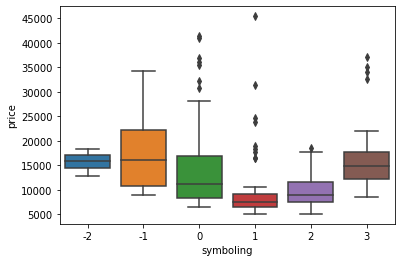

In [42]:
sns.boxplot(x = car_data["symboling"], y = car_data["price"])
# burada baktığımızda 1'e kadar aslında gayet iyi gidiyor graph ama 1'den sonra geri yükseliyor bir gariplik var diyebiliriz
# atanmış sigorta değerlerinden -1'de kutu fazla büyük ve varyansı daha büyük diyebiliriz
# ve 0 ile 1'in fazla satıldığını söyleyebiliriz
# symboling'de garip bir durum var belki modele katmayabiliriz

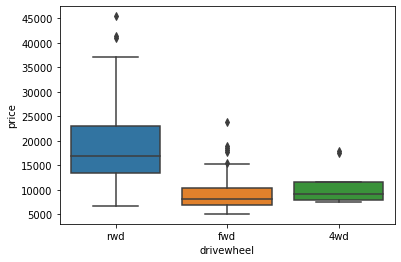

In [43]:
sns.boxplot(x = car_data["drivewheel"], y = car_data["price"])
# 4wd ile fwd arasında bir fark yok diyebiliriz
# Tahrik tekerleği kategorisinde çok önemli bir fark var. Çoğu yüksek menzilli araba, rwd çekiş tekerleğini tercih ediyor gibi görünüyor.
# 4wd ile fwd'yi beraber de alabiliriz 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


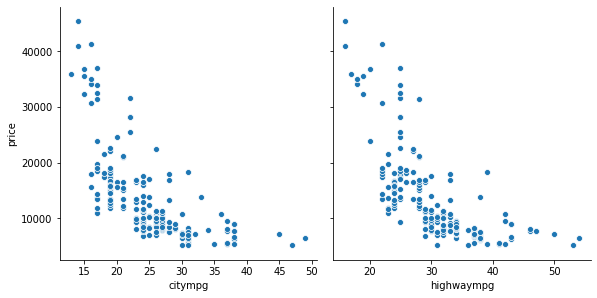

In [44]:
def pp(x,y):
    sns.pairplot(car_data, x_vars=[x,y], y_vars='price',size=4,kind='scatter')
    plt.show()
    
pp('citympg', 'highwaympg')


# burada ise negatif bir correlation olduğunu görüyoruz price ile bu iki değişkeni birleştirebiliriz

### Step 4 - Statistical Analysis

### Ho : N = 14.000 
### H1 : N =? 14.000     Tek bir örnekleme göre yani araba price'ları ortalama 14.000$' mı onu test edeceğiz
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp

In [45]:
from scipy.stats import ttest_1samp 
# bir tane vektör gireceğiz, bir tane test yaptığımız o vektörün ortalamasını gireceğiz 

In [46]:
ttest_1samp(car_data["price"],14000.0)
# p-value = 0.19 çıktı %95 güven aralğında p-value = 0.19 > 0.05 olduğundan biz 14.000 olarak ortalamayı kabul edebiliriz
# istatiksel bir bakış açısı ile bu hipotezi reddedemeyiz 
# car_data.price.mean() - gerçek ortalaması ise 13276'ydı

Ttest_1sampResult(statistic=-1.2962974148457032, pvalue=0.19633757294399531)

### Biz aslında yukarıda değişkenleri incelemiş olduk, amacımız price'ı tahmin etmek, price = f(x), x= evin özellikleri, price'a gerçekten hangi değişkenler etki ediyor onları bulacağız. 
### İlk yapacağımız işlem T-Test, T-Test'i kategorik değişkenler için kullanıyoruz, ortalama arabi fiyatı üzerinden yakıt türünü test edeceğiz, istatiksel bir test yapacağız.
### Bir hipotez sunacağız, 
### Ho : No = N1 >>  No - N1 =0 >> No : gas olanlar N1 : diesel olanlar, eğer ortalama fiyatların ikisi birbirine eşit ise Ho hipotezimizi kabul edeceğiz ve bizim için önemli bir feature olmayacak. 
### H1 : No =? N1 >> No - N1 =? 0 
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [47]:
car_data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [48]:
car_data.head()

,symboling,Make,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
car_data.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

## T-Test - Fueltype, Feature'n bizim için önemli olup olmadığını istatiksel olarak test edeceğiz

In [50]:
from scipy.stats import ttest_ind 
# T-test için scipy kütüphanesinden ttest_ind'ı almış olacağız 

In [51]:
ttest_ind(car_data["price"][car_data["fueltype"]=="gas"],car_data["price"][car_data["fueltype"]=="diesel"])

Ttest_indResult(statistic=-1.5141798891338898, pvalue=0.13153563336537977)

### p-value değeri = 0.13 > 0.05 olduğundan Ho'ı kabul etmeliyiz, yukarıdaki graph'da da gördüğümüz gibi bizim için önemli bir feature değil fueltype, ortalamalarını değerlendirmiş olduk istatistiksel olarak

### Eğer kategorik değişkenlerimizin parametreleri 2'den fazla ise de 
### Anaova Analizi(varyans analizi), Ho: N1 = N1 = N2 = N3 ..... Nk
### H1 : en az bir parametre diğerlerinden farklı

In [52]:
from scipy.stats import f_oneway 


In [53]:
drivew = car_data.groupby(["drivewheel"])["price"].apply(list); drivew
# tahrik tekerlerği tipine göre price ile grupladık 
# 3 tane grubumuz var şuan da 


drivewheel
4wd    [17450.0, 17859.167, 7603.0, 9233.0, 11259.0, ...
fwd    [13950.0, 15250.0, 17710.0, 18920.0, 23875.0, ...
rwd    [13495.0, 16500.0, 16500.0, 16430.0, 16925.0, ...
Name: price, dtype: object

In [54]:
f_oneway(drivew["4wd"], drivew["fwd"], drivew["rwd"])
# o zaman diyoruz ki Ho reddet ve H1'i kabul ediyoruz çünkü 6.63e-24 < 0.05 olduğu için, bizim için önemli bir feature 

F_onewayResult(statistic=70.32055264969262, pvalue=6.632887281209634e-24)

### En az bir tanesinin farklı olduğunu bulduk ama hangisinin veya hangilerinin farklı olduğunu bulmak istersek Post-Hoc Analizi dediğimiz tukey analizi yapacağız 

In [55]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [56]:
a = pairwise_tukeyhsd(car_data["price"],car_data["drivewheel"], alpha=0.05) # burada ilk başta price'ı ekledik, çünkü drivew göre gruplaması lazım
a.summary()

# reject True olanlar birbirinden farklı olanlar diyebiliriz istatiksel olarak 
#fwd ile 4wd arasında fark olmasına rağmen etki eden başka şeyler olduğunu söyleyebiliriz

group1,group2,meandiff,p-adj,lower,upper,reject
4wd,fwd,-1848.1547,0.6482,-6878.64,3182.3307,False
4wd,rwd,8823.3462,0.001,3692.2717,13954.4207,True
fwd,rwd,10671.5009,0.001,8537.6821,12805.3196,True


In [57]:
car_data["drivewheel"].value_counts() #burada da baktığımız da 4wd az data olduğu için olabilir 

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [58]:
car_data.groupby("drivewheel")["price"].mean()
# type'ına göre ortalamasını aldık

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64

## price = ß0 + ß1*horsepower , modelini kurduk diyebiliriz

In [59]:
from statsmodels.formula.api import ols #ordinary least square 

mdl = ols("price ~ horsepower", data = car_data).fit() # sklearn'de istatiksel özellikleri göstermiyor ama ols'de gösteriyor 

# price bağımlı değişkenimiz, horsepower ise bağımsız değişkenimiz 
mdl.summary() #summary kısmında istatiksel özelliklerini göreceğiz 

# R'dan kullanarak yapılmış bir kütüphanedir

# istatiksel özellik olarak p value değerine ve R-squared değerine bakabiliriz.
# adj. R-squared değeri fazla değişken olduğu zaman daha düşük olacak ve az değişken olduğunda şuan ki gibi daha yüksek olacak
# adj. bazen "-" ' de olabilir. buna non-linear modellerde karşılaşabiliriz. linear modeller'de çünkü 0 ile 1 arasında 

# intercept = bias yani ß0, horsepower'ın coefficient'ini de görebiliyoruz
# sonrasında ise biz şuan sadece horsepower ile bir model kurduk p-value değerine bakarsak 
# bir hipotez kurup t-test'de ki gibi p-value=0 < 0.05'den küçük diyip Ho reddet ve bizim için anlamlı bir değişken diyebiliriz
# burada birden fazla feature olursa yani modelimizde p-value değerlerine bakarak yorumlayabileceğiz 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           1.48e-48
Time:                        21:29:25   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
mdl = ols("price ~ C(drivewheel)", data = car_data).fit() # categorical bir datayı ise C ekleyerek istatiksel olarak inceleriz 
mdl.summary()

#4wd'yi base olarak alıyor dummy variables'a da eklemiyor ve ona göre karşılaştırma yapıyor  
# burada base'e göre karşılaştırdığı için örneğin rwd, fwd'den daha anlamlı ama bunu burada göremiyoruz, o yüzden base'i değiştirebiliriz
# ya da coefficient'a göre aradaki farklarını alarak anlayabiliriz  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     70.32
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           6.63e-24
Time:                        21:29:26   Log-Likelihood:                -2078.3
No. Observations:                 205   AIC:                             4163.
Df Residuals:                     202   BIC:                             4173.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.109e+04   2054.748      5.396      0.000    7035.958    1.51e+04
C(drivewheel)[T.fwd] -1848.1547   2130.408     -0.868      0.387   -6048.844    2352.535
C(drivewheel)[T.rwd]  8823.3462   2173.007      4.060      0.000    4538.660    1.31e+04
==============================================================================
Omnibus:                       57.039   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.991
Skew:                           1.308   Prob(JB):                     5.34e-27
Kurtosis:                       5.705   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
car_data.head()

,symboling,Make,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
col_names = list(car_data.drop(["price","Make","Model"], axis=1).columns)
form = "+".join(col_names) # columns'ları alıp ekledik 

In [63]:
mdl = ols("price ~ "+form, data = car_data).fit() # tüm değişkenleri ekleyip bakacağız  
mdl.summary()
# biz değişkenlerin birbirleri ile correlation olmamasını isteriz, tüm makine öğrenmesi uygulamalarında böyle 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     61.79
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           4.86e-80
Time:                        21:29:28   Log-Likelihood:                -1844.9
No. Observations:                 205   AIC:                             3774.
Df Residuals:                     163   BIC:                             3913.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.876e+04   1.02e+04     -1.844      0.067   -3.89e+04    1333.403
fueltype[T.gas]          -1.527e+04   5389.519     -2.833      0.005   -2.59e+04   -4626.644
aspiration[T.turbo]       1626.0175    885.607      1.836      0.068    -122.725    3374.760
doornumber[T.two]          187.6006    585.406      0.320      0.749    -968.356    1343.557
carbody[T.hardtop]       -3207.0350   1375.969     -2.331      0.021   -5924.058    -490.012
carbody[T.hatchback]     -3280.8341   1222.941     -2.683      0.008   -5695.684    -865.985
carbody[T.sedan]         -2151.5954   1332.017     -1.615      0.108   -4781.830     478.639
carbody[T.wagon]         -3265.6309   1455.394     -2.244      0.026   -6139.487    -391.775
drivewheel[T.fwd]           74.0486   1040.473      0.071      0.943   -1980.495    2128.592
drivewheel[T.rwd]         1032.7674   1205.057      0.857      0.393   -1346.768    3412.302
enginelocation[T.rear]    7695.0237   2535.529      3.035      0.003    2688.305    1.27e+04
enginetype[T.dohcv]      -7189.2910   4673.503     -1.538      0.126   -1.64e+04    2039.123
enginetype[T.l]          -1051.0793   1607.967     -0.654      0.514   -4226.211    2124.053
enginetype[T.ohc]         3125.6464    908.839      3.439      0.001    1331.031    4920.262
enginetype[T.ohcf]        1233.6574   1571.770      0.785      0.434   -1869.999    4337.314
enginetype[T.ohcv]       -5605.2579   1246.936     -4.495      0.000   -8067.488   -3143.027
enginetype[T.rotor]        -34.6261   2252.494     -0.015      0.988   -4482.456    4413.204
cylindernumber[T.five]   -9280.3650   2716.126     -3.417      0.001   -1.46e+04   -3917.036
cylindernumber[T.four]   -9879.0883   3054.385     -3.234      0.001   -1.59e+04   -3847.824
cylindernumber[T.six]    -6570.0303   2192.256     -2.997      0.003   -1.09e+04   -2241.148
cylindernumber[T.three]   -462.9157   4498.941     -0.103      0.918   -9346.636    8420.805
cylindernumber[T.twelve] -1.024e+04   4383.680     -2.336      0.021   -1.89e+04   -1584.328
cylindernumber[T.two]      -34.6261   2252.494     -0.015      0.988   -4482.456    4413.204
fuelsystem[T.2bbl]         -39.0684    891.987     -0.044      0.965   -1800.409    1722.272
fuelsystem[T.4bbl]       -1623.6205   2774.981     -0.585      0.559   -7103.166    3855.925
fuelsystem[T.idi]        -3493.4698   6881.659     -0.508      0.612   -1.71e+04    1.01e+04
fuelsystem[T.mfi]        -3479.7025   2589.965     -1.344      0.181   -8593.912    1634.507
fuelsystem[T.mpfi]        -244.3674   1000.854     -0.244      0.807   -2220.678    1731.943
fuelsystem[T.spdi]       -3026.7527   1381.549     -2.191      0.030   -5754.794    -298.712
fuelsystem[T.spfi]        -618.6902   2508.300     -0.247      0.805   -5571.641    4334.261
symboling     

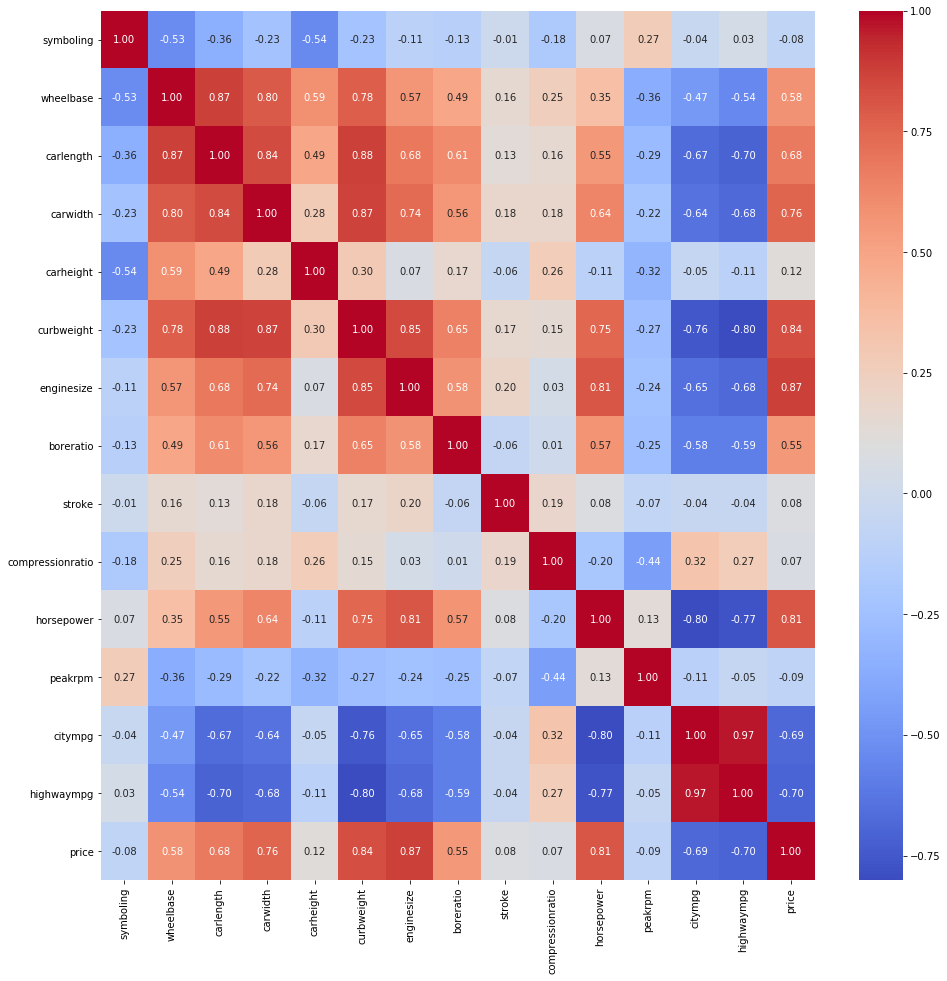

In [64]:
plt.figure(figsize=(16,16))
sns.heatmap(car_data.corr(), annot=True, cmap="coolwarm", fmt=".2f") # değerleri görmek için annot=True yaptık, colormap ile rengi belirledik
# fmt ise format sadece 2 değer görmek için o parametreyi kullandık

# burada correlationmap ile price'a etki edenleri daha detaylı görmüş olduk ve hangi numeric feature'ları modelimizde kullanalım daha iyi gözüküyor
# categoric feature'ları dummy variables'dan sonra daha iyi göreceğiz 

## Step 5 - Adding New Features

In [65]:
# ortalama aynı değerlerde olduğu için yarı yarıya aldık ve tek columns'a çevirdik
car_data['fuel_economy'] = (0.50 * car_data['citympg']) + (0.50 * car_data['highwaympg'])

In [66]:
car_data.head()

,symboling,Make,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
3,1,alfa-romero,quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
4,2,audi,ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0


In [69]:
table # aralığı belrlerken ortalamalarını dikkate alıp değerlendirdik

Make
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [68]:
# burada aslında bir aralık oluşturduk bu aralıkları da yukarıda ki describe'a göre yaptık, çünkü modellerin

car_data['price'] = car_data['price'].astype('int')

car = car_data.copy()

table = car.groupby(['Make'])['price'].mean() # burada ise ortalama değerlerini alıp her model için onları tabloya yerleştirdik

car = car.merge(table.reset_index(), how='left',on='Make')

bins = [0,10000,20000,35000] # en yüksek değer 35000'den küçük olduğu için bu aralıkta tuttuk 
cars_bin=['low','medium','high']

car_data['carsrange'] = pd.cut(car['price_y'],bins,right=False,labels=cars_bin)



In [70]:
car_data2 = car_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fuel_economy', 'carlength','carwidth', 'carsrange']]

In [71]:
car_data2.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fuel_economy,carlength,carwidth,carsrange
car_ID,,,,,,,,,,,,,,,,
1,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.0,168.8,64.1,medium
2,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,24.0,168.8,64.1,medium
3,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.5,171.2,65.5,medium
4,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,27.0,176.6,66.2,medium
5,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,20.0,176.6,66.4,medium


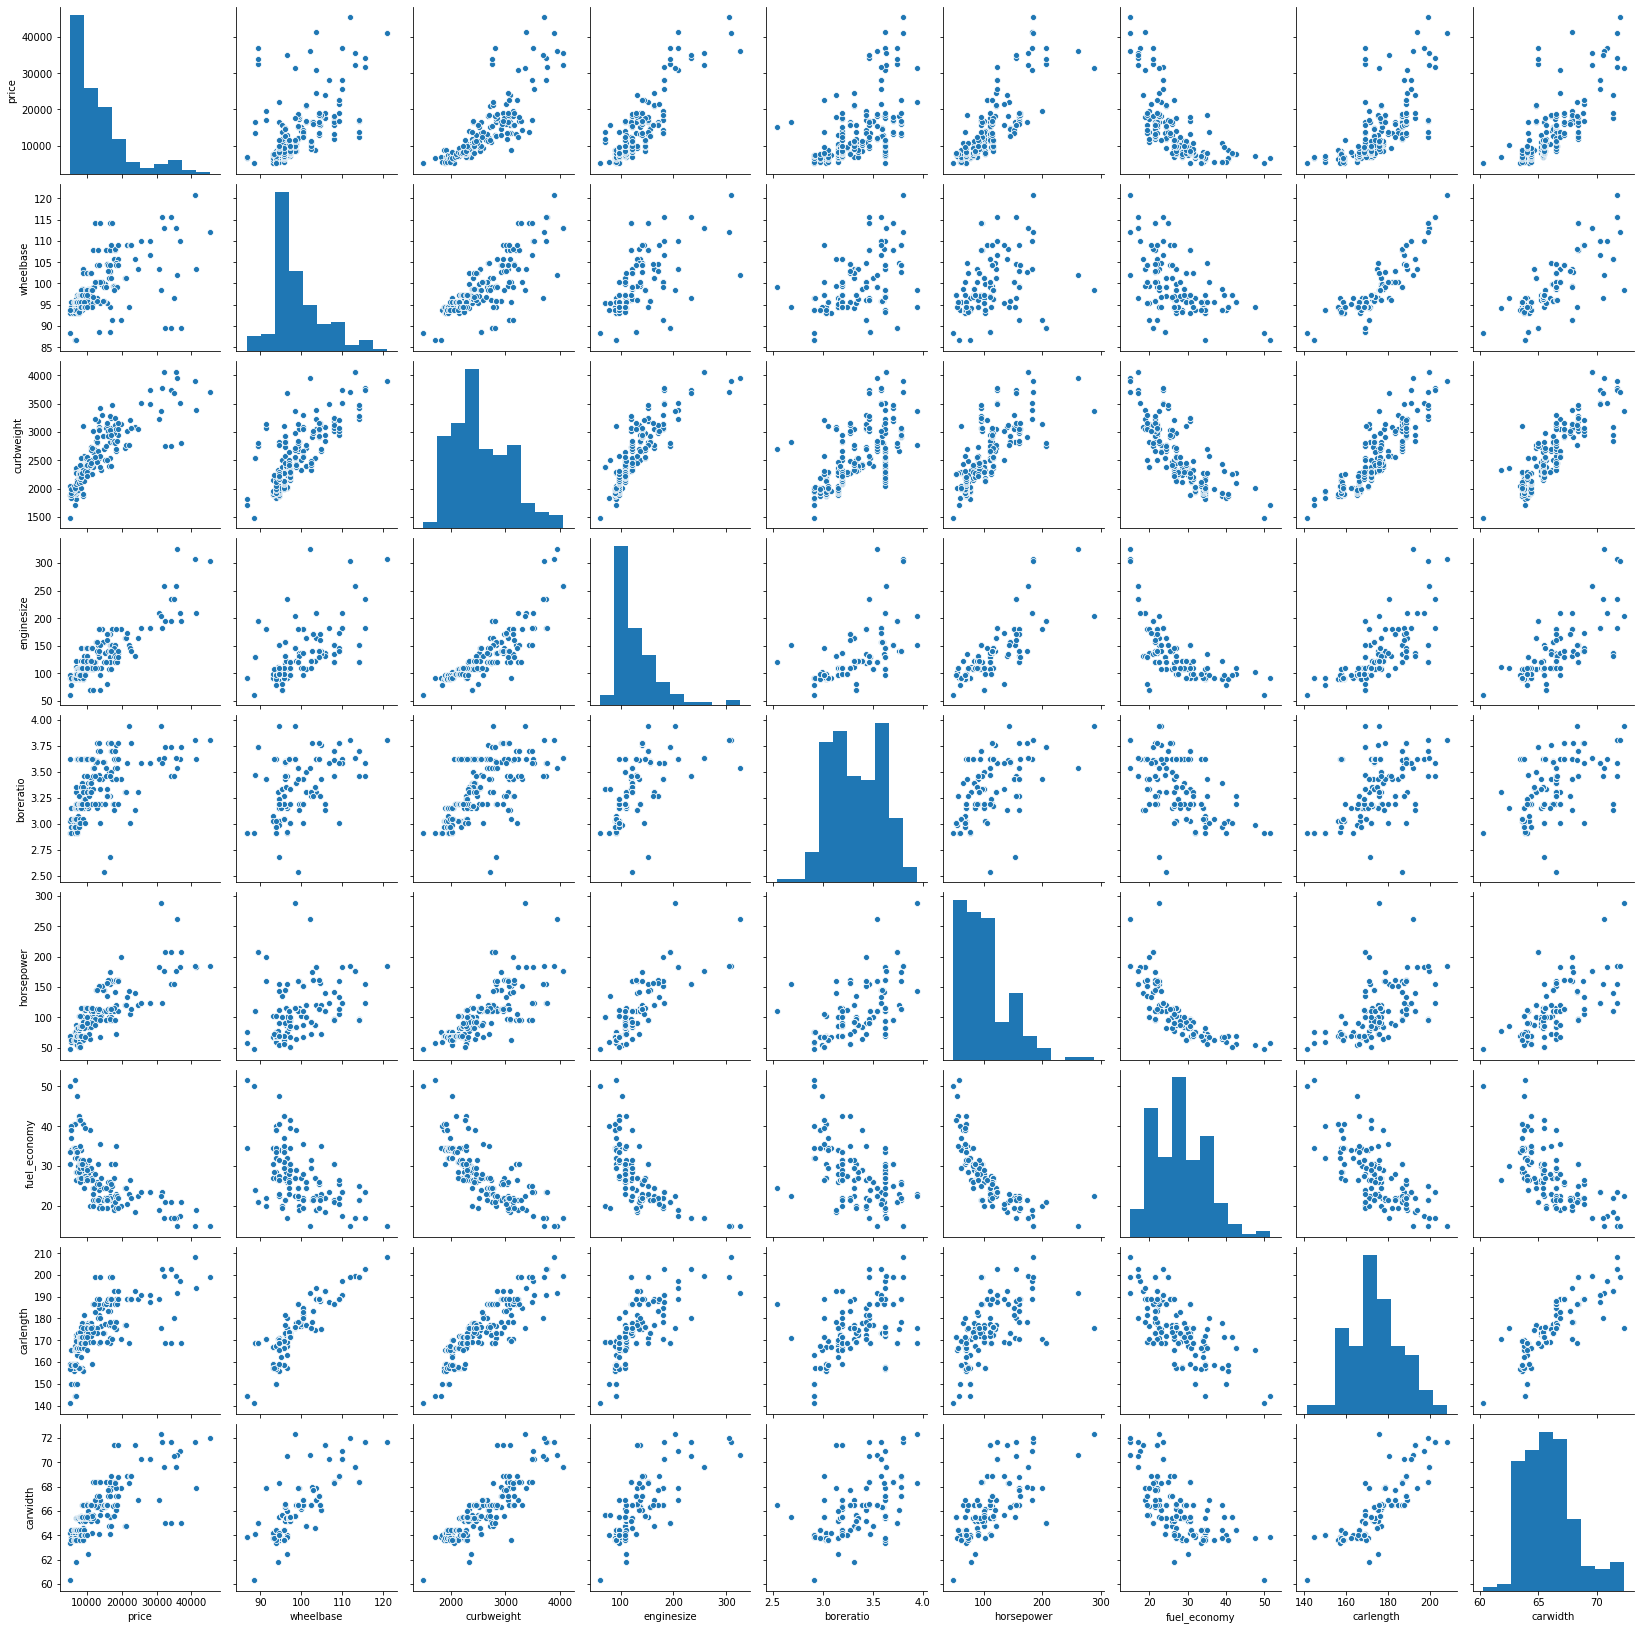

In [72]:
sns.pairplot(car_data2)
plt.show()
# numeric değişkenlerin birbirlerine göre dağılımını görüyoruz

## Step 6 - Dummy Variables
### Pandas'ın get_dummies diye bir fonksiyonunu kullanabiliriz, peki bu ne yapıyor kategorik değerler için yeni bir columns oluşturuyor
### one-hot-encoding ile bunu yapıyor,Feature için de kaç farklı kategorik değişken var ise o kadar columns açıyor ve onu içeren dataları 1 yapıyor

In [73]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True) #drop_first base değişkenini categoric almamasını sağlıyor 
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

car_data2 = dummies('carbody',car_data2)
car_data2 = dummies('cylindernumber',car_data2)
car_data2 = dummies('carsrange',car_data2)
car_data2 = dummies('fueltype',car_data2)
car_data2 = dummies('aspiration',car_data2)
car_data2 = dummies('drivewheel',car_data2)
car_data2 = dummies('enginetype',car_data2)


In [74]:
car_data2.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fuel_economy,carlength,carwidth,hardtop,...,gas,turbo,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
car_ID,,,,,,,,,,,,,,,,,,,,,
1,13495,88.6,2548,130,3.47,111,24.0,168.8,64.1,0,...,1,0,0,1,0,0,0,0,0,0
2,16500,88.6,2548,130,3.47,111,24.0,168.8,64.1,0,...,1,0,0,1,0,0,0,0,0,0
3,16500,94.5,2823,152,2.68,154,22.5,171.2,65.5,0,...,1,0,0,1,0,0,0,0,1,0
4,13950,99.8,2337,109,3.19,102,27.0,176.6,66.2,0,...,1,0,1,0,0,0,1,0,0,0
5,17450,99.4,2824,136,3.19,115,20.0,176.6,66.4,0,...,1,0,0,0,0,0,1,0,0,0


In [75]:
car_data2.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fuel_economy', 'carlength', 'carwidth', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'medium', 'high', 'gas', 'turbo', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor'],
      dtype='object')

In [76]:
car_data2.shape

(205, 31)

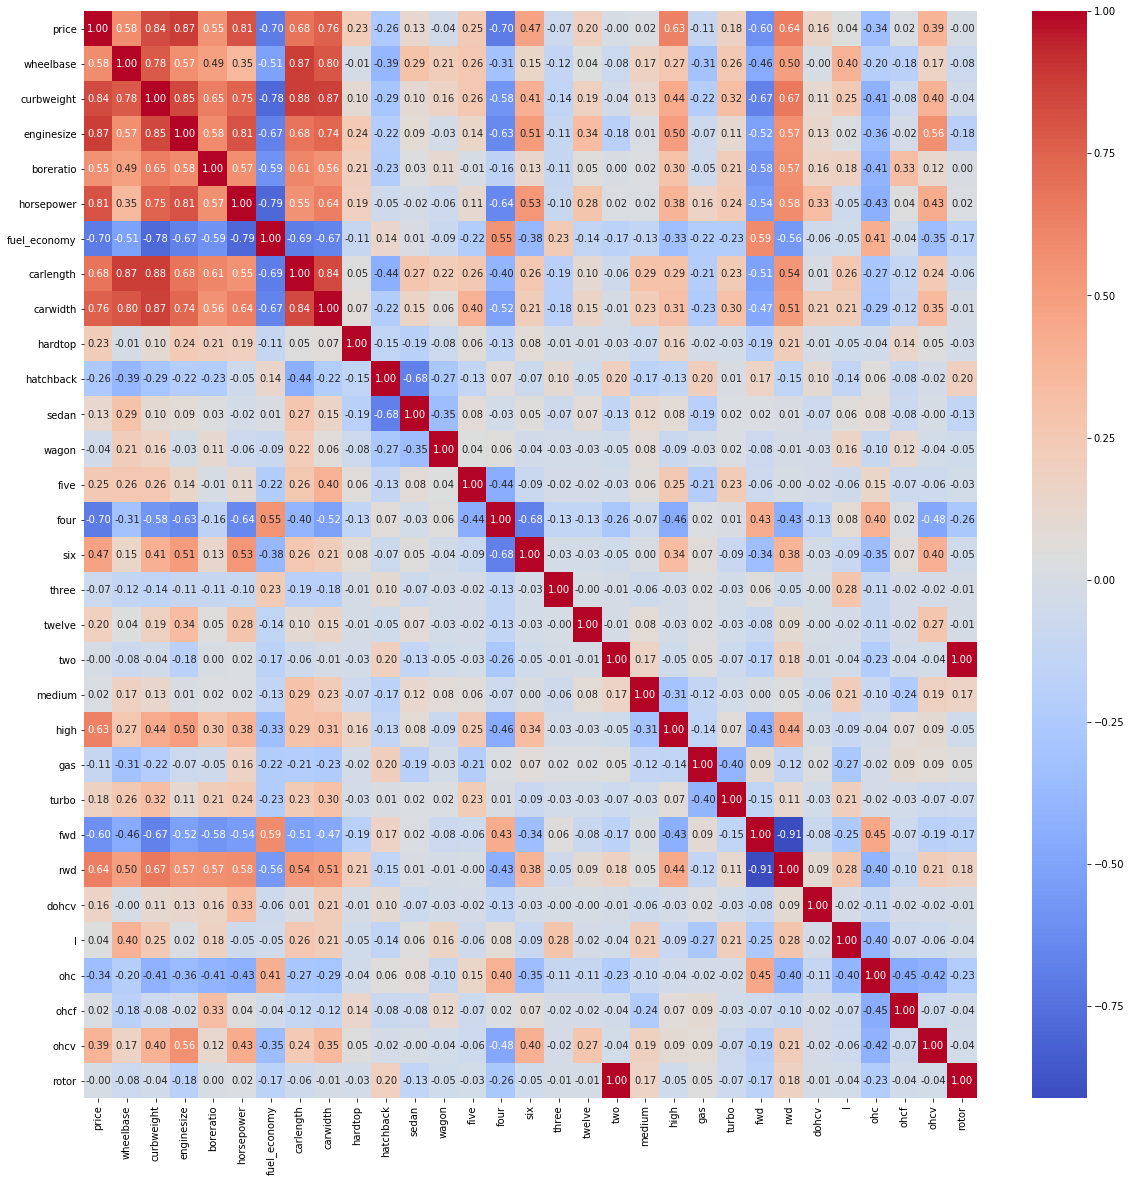

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(car_data2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
#categoric değişkenleri de ekledikten sonra price ile hangilerinin correlation'ı var görebiliyoruz 
# fuel_economy'nin price ile negatif bir correlation'ı var ama anlamlı bir correlation diyebiliriz 
# curbweight,enginesize,horsepower,carwidth price ile en yüksek correlation var diyebiliriz

In [78]:
col_names1 = list(car_data2.drop(["price"], axis=1).columns)
form1 = "+".join(col_names1) 

In [79]:
mdl = ols("price ~ "+form1, data = car_data2).fit() 
mdl.summary()

# categoric feature'ları da ekledikten sonra istatiksel olarak inceledik ve R-squared 0.926 çıktı baya iyi 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     75.64
Date:                Mon, 04 Jan 2021   Prob (F-statistic):           7.38e-84
Time:                        21:30:32   Log-Likelihood:                -1865.4
No. Observations:                 205   AIC:                             3791.
Df Residuals:                     175   BIC:                             3891.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.615e+04   1.34e+04     -2.699      0.008   -6.26e+04   -9719.082
wheelbase      117.5125     82.680      1.421      0.157     -45.666     280.691
curbweight       2.4800      1.804      1.375      0.171      -1.081       6.041
enginesize      28.9598     20.989      1.380      0.169     -12.465      70.385
boreratio    -2376.6267   1618.535     -1.468      0.144   -5570.987     817.734
horsepower      87.2950     16.253      5.371      0.000      55.218     119.372
fuel_economy    82.3852     73.343      1.123      0.263     -62.365     227.135
carlength      -38.1827     51.829     -0.737      0.462    -140.473      64.108
carwidth       678.6385    245.862      2.760      0.006     193.403    1163.874
hardtop      -3382.2330   1438.180     -2.352      0.020   -6220.644    -543.823
hatchback    -5077.8321   1240.611     -4.093      0.000   -7526.318   -2629.346
sedan        -3941.1638   1301.654     -3.028      0.003   -6510.125   -1372.202
wagon        -4669.9475   1397.381     -3.342      0.001   -7427.836   -1912.059
five          -1.16e+04   2755.340     -4.210      0.000    -1.7e+04   -6161.889
four         -1.244e+04   3129.114     -3.976      0.000   -1.86e+04   -6264.981
six          -9168.0699   2222.933     -4.124      0.000   -1.36e+04   -4780.861
three        -6857.1117   4580.640     -1.497      0.136   -1.59e+04    2183.296
twelve       -7918.8185   3320.869     -2.385      0.018   -1.45e+04   -1364.710
two          -3453.9304   2004.960     -1.723      0.087   -7410.944     503.083
medium         747.4817    474.161      1.576      0.117    -188.329    1683.292
high          4340.8501    810.144      5.358      0.000    2741.939    5939.761
gas          -1012.0954   1089.364     -0.929      0.354   -3162.077    1137.886
turbo         -583.6561    749.884     -0.778      0.437   -2063.637     896.325
fwd            -66.3855   1052.870     -0.063      0.950   -2144.343    2011.572
rwd            728.2578   1174.424      0.620      0.536   -1589.600    3046.115
dohcv        -1.286e+04   4358.833     -2.951      0.004   -2.15e+04   -4260.875
l             1543.8255   1285.475      1.201      0.231    -993.204    4080.855
ohc           2718.4845    874.152      3.110      0.002     993.248    4443.721
ohcf          4249.6999   1344.638      3.160      0.002    1595.906    6903.494
ohcv         -3960.7308   1331.791     -2.974      0.003   -6589.170   -1332.291
rotor        -3453.9304   2004.960     -1.723      0.087   -7410.944     503.083
==============================================================================
Omnibus:                       27.021   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.988
Skew:                           0.471   Prob(JB):                     3.51e-19
Kurtosis:    

## Step - 7 Train-Test Split and prediction

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [81]:
lr = LinearRegression() 

features = ["horsepower"] #tek değişken olarak horsepower'ı aldık
x = car_data2[features]
y = car_data2["price"]
 
model = lr.fit(x,y)
print("The coefficient is:", *model.coef_) # coefficient değerlerini yazdırdık
print("The intercept is:" , model.intercept_)

# tek bir x bağımsız değişkeni için coefficent'ını ve bias değerini bulduk

The coefficient is: 163.26285044874692
The intercept is: -3721.747707210019


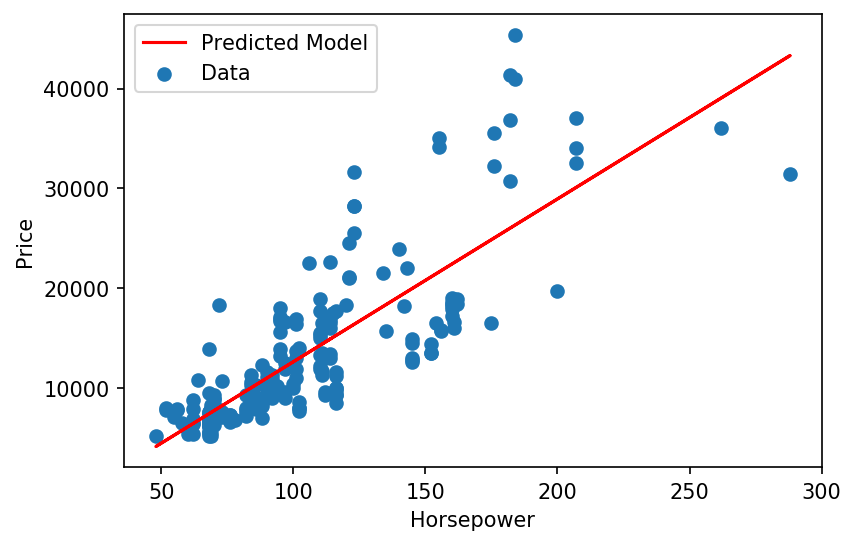

In [82]:
y_predicted = model.predict(x) # burada ise her bir x değerine karşılık gelen modeli söylüyor, ve aşağıda da onu çizdiriyoruz 

plt.figure(dpi=150)
plt.scatter(car_data2["horsepower"], car_data["price"])
plt.plot(x, y_predicted, color="r" )

plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend(["Predicted Model", "Data"])
plt.show()

# lineear bir model oluşturduk

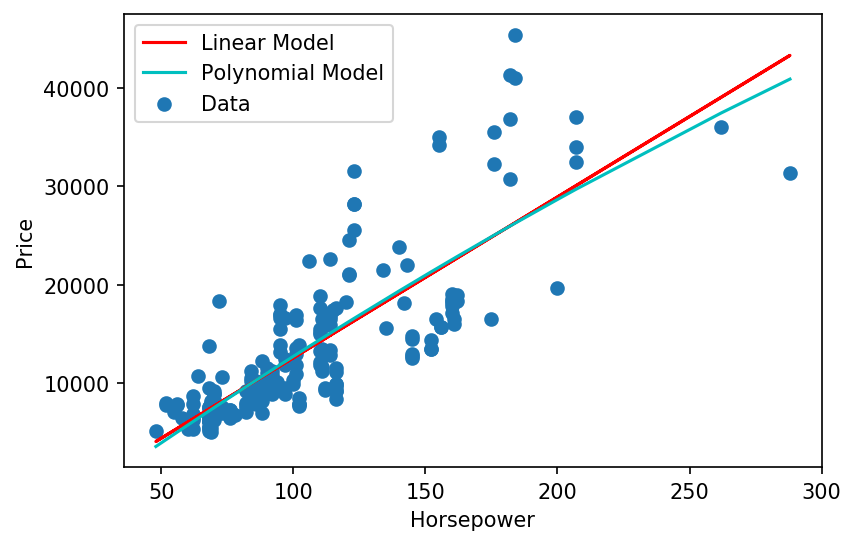

In [83]:
import operator # modelleri sıralamak için kullanacağız
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x) # aldığımız X bağımsız değişkenlerini polynomial feature'a dönüştürdük

model = lr.fit(x_poly,y)
y_predicted_poly = model.predict(x_poly)


sort_axis = operator.itemgetter(1)
sorted_zip = sorted(zip(x.values,y_predicted_poly), key=sort_axis)
x_sorted, y_predicted_poly_sorted = zip(*sorted_zip)
# burada sıralama yaptık modelleri 

plt.figure(dpi=150)
plt.scatter(car_data["horsepower"], car_data["price"])
plt.plot(x, y_predicted, color="r" )
plt.plot(x_sorted, y_predicted_poly_sorted, color="c" )

plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend(["Linear Model", "Polynomial Model", "Data"])
plt.show()


## Polynomial 2.dereceden bir model oluşturduk ve bunu çizdirdik ve linear modelden biraz farklı olduğunu görüyoruz  

In [84]:
lr = LinearRegression() 

features = ["horsepower"]
x = car_data2[features]
y = car_data2["price"]

lr.fit(x,y) # başka bir değişkene atmamıza gerek yok lr onu tutuyor 

r2 = lr.score(x,y)

print("R2 Score is ", r2)

# R2 Score değeri 1'e ne kadar yakın ise modelimiz o kadar iyidir 

R2 Score is  0.6530872206560677


In [85]:
car_data2.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fuel_economy', 'carlength', 'carwidth', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'medium', 'high', 'gas', 'turbo', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor'],
      dtype='object')

In [86]:
x.shape

(205, 1)

In [87]:
X= car_data2.drop(["price"], axis=1)
y= car_data2["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42) 

# random_state ise rastgele ayırıyor bunları test ile train değişmesin istiyorsak rastgele bir sayı verebiliriz
# 100 kere de çağırsak aynı test ve train'i verecek, kullanmazsak ise farklı train ve test setlerini verecek,

# random_state'i şöyle düşünebiliriz, aynı random indexleri veya sayıları kullanıyor diyebiliriz belirli aralıkta 

# test datasını %30 train datasını %70 olarak ayırdık

mdl = LinearRegression()
mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
mean_squared_error(y_test, ypred)
r2_score(y_test, ypred)

# oluşturduğumuz model'in r2_score değeri gerçekten iyi bir değer çıktı, tüm değişkenleri kattıktan sonra bakalım daha iyi yapabilir miyiz

0.8513618528092932

### F-regression >> y ~ x 
#### Her bir x bağımsız değişkenini tek tek ekleniyor ve price'ı prediction etmek için kullanılıyor
#### p-value'leri tahmin ettikten sonra en önemli değişkenleri buluyoruz 
#### Feature Selection methodları hiç bir zaman optimum bir sonuç vermez ama en iyi feature'ları seçmeye çalışacağız

In [88]:
from sklearn.feature_selection import SelectKBest, f_regression

X_new = SelectKBest(f_regression, k=10).fit_transform(X_train,y_train)
X_new.shape

# bize en iyi 10 feature'ı seçti burada 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


(143, 10)

In [89]:
mdl_f = f_regression(X_train,y_train) #isimleri görmek istiyorsak f_regression ile yapmalıyız 
X_train.columns[np.argsort(mdl_f[1])] 
# argsort yaptığımız da en küçükleri sıralayacak 
# ve bunu columns üzerinden sıralarsak indexlere göre enginesize'ın en yüksek değeri olduğunu görebiliriz 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'fuel_economy',
       'four', 'carlength', 'rwd', 'fwd', 'wheelbase', 'boreratio', 'high',
       'six', 'ohc', 'ohcv', 'hardtop', 'hatchback', 'twelve', 'five', 'dohcv',
       'turbo', 'sedan', 'l', 'medium', 'gas', 'ohcf', 'wagon', 'two', 'rotor',
       'three'],
      dtype='object')

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression

mdl_select = SelectKBest(f_regression, k=10) #böyle en iyi değişkenleri bulacak 
X_new = mdl_select.fit_transform(X_train,y_train) # burada fit edip X_new'e atacağız 
X_new_test = mdl_select.transform(X_test) # X_test'i de X_new_test olarak değiştirdik 10 tane seçtiğimiz için 

mdl = LinearRegression()
mdl.fit(X_new, y_train)
ypred = mdl.predict(X_new_test)
r2_score(y_test, ypred)

# burada 0.81'e düştü demek ki 10 tane yeterli olmuyor diyebiliriz 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


0.8105824535571384

In [91]:
X_train.shape

(143, 30)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true

[0.7534911118189425, 0.7750292010394492, 0.7865193676058607, 0.7758640277170188, 0.7632006984155942, 0.7971084873027852, 0.7966320661625933, 0.8097365558094276, 0.8109617968214907, 0.8105824535571384, 0.8105795378085529, 0.8699626668990579, 0.8664980218765432, 0.863663232220929, 0.8655701961637997, 0.7813925181274084, 0.7951851742799338, 0.8022932625497576, 0.8216444458547792, 0.8381120015842792, 0.8370557960198787, 0.8348935919778206, 0.8254012892101986, 0.8266713112688047, 0.8281793513787001, 0.8489066658802451, 0.8494394296540764, 0.851361852809293, 0.8513618528092932, 0.8513618528092932]


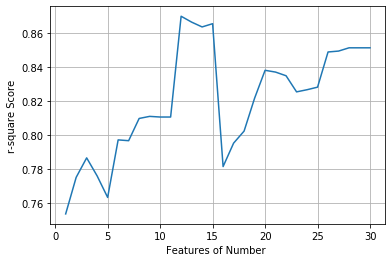

In [92]:
r2_scores = [ ] # boş bir liste oluşturduk r-square value için 
s = X_train.shape[1]

for i in range(s): # columns sayısı kadar dönsün 
    mdl_select = SelectKBest(f_regression, k= i+1) # 0'dan başlayıp i kadar artsın
    X_new = mdl_select.fit_transform(X_train,y_train)
    X_new_test = mdl_select.transform(X_test) 

    mdl = LinearRegression()
    mdl.fit(X_new, y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))

plt.plot(np.arange(1,s+1),r2_scores) # 1'den n+1'e kadar(x axis) r-square(y axis) değerlerini çizdirecek 
plt.grid(True) # grid-ızgara ile çizdirelim ki daha anlaşılır olsun
plt.xlabel("Features of Number ")
plt.ylabel("r-square Score")
print(r2_scores)

# 11 değişken ile daha yüksek bir score'a ulaşıyoruz diyebilirim, çünkü test datası istediğimiz gibi bir vakitten sonra düşüyor
# r2_score değeri : 0.869

In [93]:
np.argmax(r2_scores) # buradan da görebiliriz demek ki 11 değişken bizim için yeterli 

11

### Mutual information

In [94]:
from sklearn.feature_selection import mutual_info_regression 
# bilgi teorisinden geliyor yani birbirleri ile ne kadar ortak bilgiyi paylaşıyorlar onu göreceğiz 
# mutual_info_regression regresyon problems


In [95]:
mdl_f = mutual_info_regression(X_train,y_train)
# bırada direkt olarak veriyor, değerlerimizi görüyoruz max değerini almamız lazım

In [96]:
ab = np.argsort(mdl_f)[::-1]
# default olarak küçükten büyüğe sıralıyor, reverse yaparsak tam tersini yani büyükten küçüğe sıralanmış halini verecek

[0.6835851840133689,
 0.6459173068830613,
 0.7506450214862226,
 0.7784191348047661,
 0.7763235443227227,
 0.7631665985112589,
 0.7641469305509703,
 0.7655379376575968,
 0.7835029692648754,
 0.7865783457973441,
 0.8105795378085529,
 0.8159859857856409,
 0.8170864766958598,
 0.863663232220929,
 0.8704533817747844,
 0.8732088797078772,
 0.8670416111037608,
 0.8632399773466072,
 0.8643516405187561,
 0.8813296973233905,
 0.8811576459564671,
 0.8405579192218624,
 0.8532418621605197,
 0.8229590553450684,
 0.8316778739104727,
 0.8482694109679206,
 0.8494394296540755,
 0.849439429654075,
 0.8513618528092932,
 0.8513618528092932]

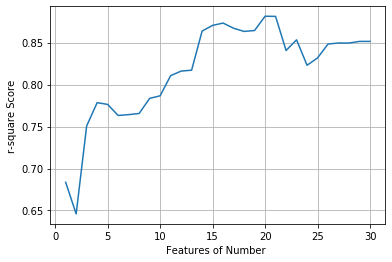

In [97]:
r2_scores = [ ] # boş bir liste oluşturduk r-square value için 
s = X_train.shape[1]

for i in range(s): 
    X_new = X_train.iloc[:,ab[:i+1]]            #satırların hepsini alıyoruz, columns'dan ise sadece ab'nin ilk i elemanını alacağız
    X_new_test = X_test.iloc[:,ab[:i+1]]  

    mdl = LinearRegression()
    mdl.fit(X_new, y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))

plt.plot(np.arange(1,s+1),r2_scores) # 1'den n+1'e kadar(x axis) r-square(y axis) değerlerini çizdirecek 
plt.grid(True) # grid-ızgara ile çizdirelim ki daha anlaşılır olsun
plt.xlabel("Features of Number ")
plt.ylabel("r-square Score")
r2_scores

# daha yüksek bir r-square değerine ulaştık  r2_score = 0.8813
# bu feature selection modeli bizim dataset için daha iyi olduğu gözüküyor 
# modelimizin graph'ı da daha iyi diyebiliriz 

In [98]:
np.argmax(r2_scores)


19

### RFE - Recursive Feature Elimination
#### Bir model belirliyoruz, tüm değişkenleri koyuyor tek tek deniyor, modelin içinden feature çıkarıyor
#### Model daha kötü hale geliyorsa significant feature oluyor, bu şekilde en iyi değişkenleri bulmaya çalışıyor

29
0.8513618528092914


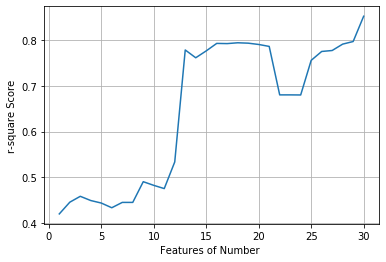

In [99]:
from sklearn.feature_selection import RFE 

mdl = LinearRegression()
mdl_rfe = RFE(estimator = mdl, n_features_to_select = 1, step = 1 )
# estimator: kullanacağımız model oluyor 
# 1 feature kalana kadar gitsin demek oluyor 
# step ise kaçar kaçar çıkarmasını sağlıyor feature'ların 

mdl_rfe.fit(X_train,y_train) # modeli fit ettik
ab = mdl_rfe.ranking_
# 24. feature'ı en önemli feature olarak belirledi 

r2_scores = [ ] # boş bir liste oluşturduk r-square value için 
s = X_train.shape[1]

for i in range(s): 
    X_new = X_train.iloc[:,ab[:i+1]-1]   # ilk 0. columns'ı getirmediği için -1 yapıyoruz 
    X_new_test = X_test.iloc[:,ab[:i+1]-1]  

    mdl = LinearRegression()
    mdl.fit(X_new, y_train)
    ypred = mdl.predict(X_new_test)
    r2_scores.append(r2_score(y_test, ypred))

plt.plot(np.arange(1,s+1),r2_scores) # 1'den n+1'e kadar(x axis) r-square(y axis) değerlerini çizdirecek 
plt.grid(True) # grid-ızgara ile çizdirelim ki daha anlaşılır olsun
plt.xlabel("Features of Number ")
plt.ylabel("r-square Score")
print(np.argmax(r2_scores))
print(np.max(r2_scores))

# RFE ile 29 feature'ı da aldık ama 0.85 çıktı 
# ama mutual information ile en yüksek değere ulaştık 

### Select From Model
#### ordinary least square'de coefficient'ları görmüştük, coefficient üzerinden seçim yapacak yani modeller üzerinden çıkaracağız
#### feature importance değerlerini bu tahminleme algoritmalarında çıkarabiliyoruz
#### Linear regression, decision tree, support vector, random forest regression'da çıkarabiliyoruz, hemen hemen her modelde hangi değişken daha önemli çıkarabiliyoruz

In [100]:
from sklearn.feature_selection import SelectFromModel 

mdl = LinearRegression() 
mdl.fit(X_train,y_train)
mdl_sfm = SelectFromModel(mdl, max_features=5) #threshold=0 olması tüm değişkenleri alıyor 
mdl_sfm.fit(X_train,y_train)
mdl_sfm.transform(X_train).shape  #en iyi 10 değişkeni alıyor, default olarak verirsek

(143, 5)

### Random Forest Regresyonu
#### Random Forest Algoritması, birden fazla karar ağacını oluşturur ve daha doğru ve istikrarlı bir tahmin elde etmek için onları birleştirir.Rastgele ormanın büyük bir avantajı, mevcut makine öğrenmesi sistemlerinin çoğunu oluşturan hem sınıflandırma hem de regresyon problemleri için kullanılabilmesidir.

In [101]:
from sklearn.ensemble import RandomForestRegressor 
# Random Forest Regresyon, scikit-learn kütüphanesi ensemble modülünün bir sınıfı olarak tanımlanmış.
X = car_data2.drop(["price"], axis=1)
y = car_data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = RandomForestRegressor(n_estimators=100, random_state = 42)
#default olarak 100 alıyor 

reg.fit(X_train,y_train)
y_head = reg.predict(X_test)

#Tahmin Skoru
print("r-square Values :",r2_score(y_test,y_head)) 

# en yüksek r-square değerini Random Forest Regresyon'da bulduk. 

r-square Values : 0.9435575712445562


### Karar Ağacı(Decision Tree) Regresyonu
#### Karar Ağaçları Algoritmaları hem sınıflandırma da hem de regresyonda kullanılır. Regresyon için kullanılan algoritmayı şöyle açıklamak gerekirse; Bağımsız değişkenleri bilgi kazancına göre aralıklara ayırıyor. Tahmin esnasında bu aralıktan bir değer sorulduğunda cevap olarak bu aralıktaki (eğitim esnasında öğrendiği) ortalamayı söylüyor. Bu sebeple karar ağacı regresyonu diğer regresyon modelleri gibi sürekli değil, kesiklidir. 

In [102]:
from sklearn.tree import DecisionTreeRegressor

X = car_data2.drop(["price"], axis=1)
y = car_data2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
y_head=tree_reg.predict(X_test)

#Tahmin Skoru
print("r_square Values :",r2_score(y_test,y_head)) 

r_square Values : 0.9150863202306262
